The following represents a mapping of the drinking water fountains and hydration systems (bottle fillers and dog fountains) open to public use at Metro Facilities, Parks and Greenways. Data includes type of system and if the system is ADA compliant.

In [2]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [4]:
#load data file from data.nashville.gov, check if 'init' is in the CRS string (no)
hydration = gpd.read_file('../data/Public Water Fountains and Hydration Systems (GIS).geojson')
print(hydration.crs)
hydration.head( )

epsg:4326


,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry
0,Beaman Water Fountain,None,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310)
3,West Park Water Fountain,Ballfield,N,45992,36.16179583,N,1,-86.86378994,Single with foot pedal,POINT (-86.86379 36.16180)
4,Richland Park Water Fountain,Playground,N,46012,36.15139384,N,1,-86.84589094,Single with foot pedal,POINT (-86.84589 36.15139)


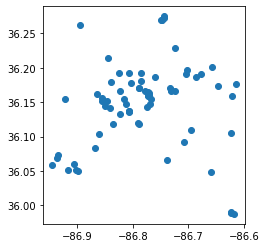

In [5]:
hydration.plot();

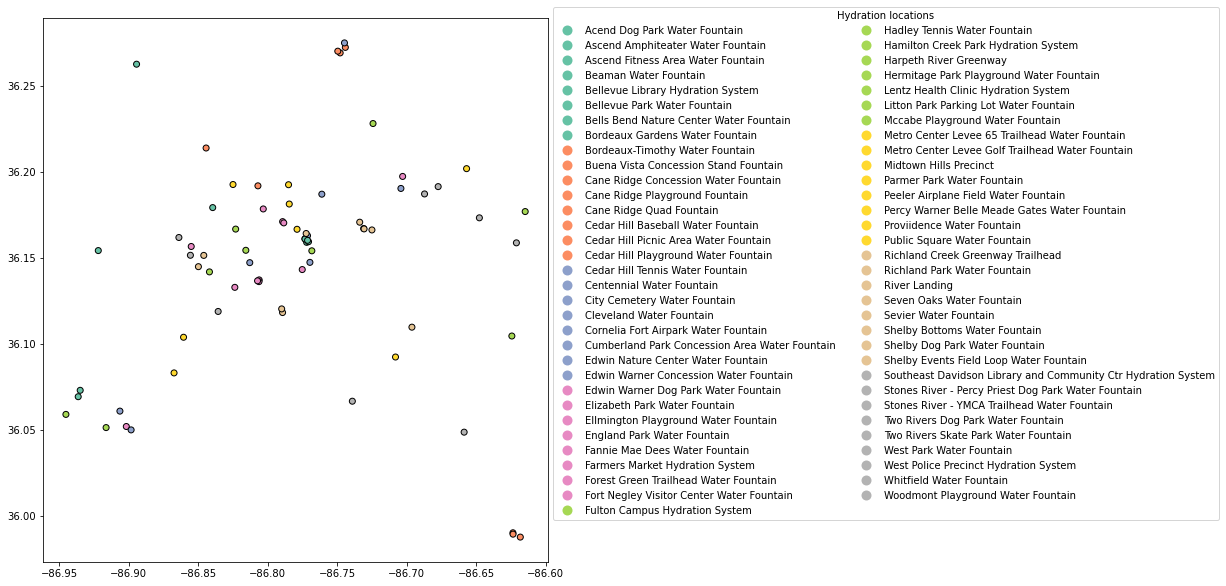

In [16]:
#Plot hydration stations
leg_kwds = {'title': 'Hydration locations', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

hydration.plot(column = hydration['name'], figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

This really doesn't mean much without a map overlaying it.  Try bringing in the zip codes 

In [17]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')

In [19]:
zipcodes.head()

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


In [23]:
hydration_zips = gpd.sjoin(hydration, zipcodes, op='within', how='right')

In [24]:
hydration_zips.head()

,index_left,name,location,dog,objectid_x,lon,ada,cnt,lat,feat_type,zip,objectid_y,po_name,shape_stlength,shape_starea,geometry
0,39.0,Peeler Airplane Field Water Fountain,Air Plane Field,N,46608,36.20180578,N,1,-86.65680453,Single with foot pedal,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,36.0,Litton Park Parking Lot Water Fountain,Parking Lot,N,46605,36.22802137,N,1,-86.72411209,Single with foot pedal,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,19.0,Sevier Water Fountain,Playground,Y,46584,36.1181821,N,1,-86.78920552,Standard/ADA/Bottle Filler,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
2,20.0,Sevier Water Fountain,Near Kirkwood and 12th,Y,46585,36.12029853,N,1,-86.78984818,Standard/ADA/Bottle Filler,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."


<AxesSubplot:>

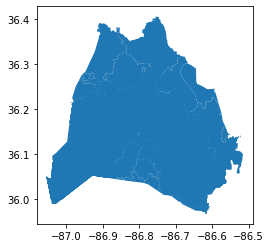

In [25]:
hydration_zips.plot()

In [32]:
#draw dog vs ada locations
hydration_zip_map = folium.Map(location =  [36.20180578,-86.65680453], zoom_start = 12)

folium.GeoJson(zipcodes).add_to(hydration_zip_map)

#iterate through stops_in_37207 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in hydration.iterrows():
    loc = [row_values['lon'], row_values['lat']]
    pop=''
    color='purple'
    if row_values['dog']=='Y':
        pop='dog'
        color='lightgray'
    if row_values['ada']=='Y':
        pop='ada'
        color='blue'
    if row_values['ada']=='Y' and row_values['dog']=='Y': 
        color='green'
        pop='dog, ada'
    marker = folium.Marker(
        location = loc, 
        popup = pop,
        icon=folium.Icon(color = color)) 
    
    marker.add_to(hydration_zip_map)
hydration_zip_map.save('../maps/hydration_zip_map.html')

#display our map
hydration_zip_map